<h1>Table of Contents<span class="tocSkip"></span></h1>


# Introduction
<hr style = "border:2px solid black" ></hr>


**What?** Public, Private, Protected attributes



# What is encapsulation?
<hr style = "border:2px solid black" ></hr>


- Encapsulation is seen as the bundling of data with the methods that operate on that data. 
- It is often accomplished by providing two kinds of methods for attributes. 
- The methods for retrieving or accessing the values of attributes are called **getter methods**. Getter methods do not change the values of attributes, they just return the values. 
- The methods used for changing the values of attributes are called **setter methods**. 
- There is a difference and here is the relationship: abstraction = encapsulation + hiding. Essentially abstraction is present, iff hiding and encapsulation is used.



# Public, Private, Protected
<hr style = "border:2px solid black" ></hr>

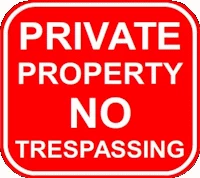


There are two ways to restrict the access to class attributes:

1. **protected**. First, we can prefix an attribute name with a leading underscore "_". It tells users of the class not to use this attribute unless, somebody writes a subclass.
2. **private**. Second, we can prefix an attribute name with two leading underscores "__". The attribute is now inaccessible and invisible from outside. It's neither possible to read nor write to those attributes except inside of the class definition itself.



In [1]:
class A:
    
    def __init__(self):               
        self.public = "I am public"
        self._protected = "I am protected"
        self.__private = "I am private" 

instantiationOfA = A()

In [2]:
print(instantiationOfA.public)
print(instantiationOfA._protected)
print(instantiationOfA._A__private)

I am public
I am protected
I am private



- Whenever we assign or retrieve any object attribute Python searches it in the object's `__dict__` dictionary
- When the Python compiler sees a private attribute, it actually transforms the actual name to `_[Class name]__[private attribute name]`. 
- **In practice** it is more common to use public and protected attribute,



In [3]:
print(instantiationOfA.__dict__)

{'public': 'I am public', '_protected': 'I am protected', '_A__private': 'I am private'}


# Class Decorators
<hr style = "border:2px solid black" ></hr>

- `@property` The Pythonic way to introduce attributes is to make them public, and not introduce getters and setters to retrieve or change them.
- `@classmethod` To add additional constructor to the class.
- `@staticmethod` To attach functions to classes so people won't misuse them in wrong places.

## @Property

Let's assume one day we decide to make a class that could store the temperature in degree Celsius. The temperature will be a private method, so our end-users won't have direct access to it.

The class will also implement a method to convert the temperature into degree Fahrenheit. And we also want to implement a value constraint to the temperature, so that it cannot go below -273 degree Celsius. One way of doing this is to define a getter and setter interfaces to manipulate it.

In [4]:
class Celsius:
    
    def __init__(self, temperature = 0):
        self.set_temperature(temperature)

    def to_fahrenheit(self):
        return (self.get_temperature() * 1.8) + 32

    def get_temperature(self):
        return self._temperature

    def set_temperature(self, value):
        if value < -273:
            raise ValueError('Temperature below -273 is not possible')
        
        self._temperature = value

In [5]:
# c = Celsius(-277) # this returns an error
c = Celsius(37)
c.get_temperature()

37

Instead of that, now the **property** way. Where we define the `@property` and the `@[attribute name].setter`.

In [6]:
class Celsius:
    
    def __init__(self, temperature = 0):
        self._temperature = temperature

    def to_fahrenheit(self):
        return (self.temperature * 1.8) + 32
    
    # have access to the value like it is an attribute instead of a method
    @property
    def temperature(self):
        return self._temperature
    
    # like accessing the attribute with an extra layer of error checking
    @temperature.setter
    def temperature(self, value):
        if value < -273:
            raise ValueError('Temperature below -273 is not possible')
        
        print('Setting value')
        self._temperature = value

In [7]:
c = Celsius(37)

# much easier to access then the getter, setter way
print(c.temperature)

# note that you can still access the private attribute
# and violate the temperature checking, 
# but then it's the users fault not yours
c._temperature = -300
print(c._temperature)

# accessing the attribute will return the ValueError error
# c.temperature = -300

37
-300


## @classmethod and @staticmethod

`@classmethods` create alternative constructors for the class. An example of this behavior is there are different ways to construct a dictionary.

In [8]:
print(dict.fromkeys(['raymond', 'rachel', 'mathew']))

{'raymond': None, 'rachel': None, 'mathew': None}


In [9]:
import time

class Date:
    # Primary constructor
    def __init__(self, year, month, day):
        self.year = year
        self.month = month
        self.day = day

    # Alternate constructor
    @classmethod
    def today(cls):
        t = time.localtime()
        return cls(t.tm_year, t.tm_mon, t.tm_mday)

# Primary
a = Date(2012, 12, 21) 
print(a.__dict__)

# Alternate
b = Date.today() 
print(b.__dict__)

{'year': 2012, 'month': 12, 'day': 21}
{'year': 2023, 'month': 1, 'day': 3}


The `cls` is critical, as it is an object that holds the class itself. This makes them work with inheritance.

In [10]:
class NewDate(Date):
    pass

# Creates an instance of Date (cls=Date)
c = Date.today()      
print(c.__dict__)

# Creates an instance of NewDate (cls=NewDate)
d = NewDate.today()   
print(d.__dict__)

{'year': 2023, 'month': 1, 'day': 3}
{'year': 2023, 'month': 1, 'day': 3}


The purpose of **@staticmethod** is to attach functions to classes. We do this to improve the findability of the function and to make sure that people are using the function in the appropriate context.

In [11]:
class Date:
    # Primary constructor
    def __init__(self, year, month, day):
        self.year = year
        self.month = month
        self.day = day

    # Alternate constructor
    @classmethod
    def today(cls):
        t = time.localtime()
        return cls(t.tm_year, t.tm_mon, t.tm_mday)
    
    # the logic belongs with the date class
    @staticmethod
    def show_tomorrow_date():
        t = time.localtime()
        return t.tm_year, t.tm_mon, t.tm_mday + 1

In [12]:
Date.show_tomorrow_date()

(2023, 1, 4)

# Conclusions
<hr style = "border:2px solid black" ></hr>


| Naming | Type | Meaning | 
| ---- | ---- | ------- |
| `name`| Public | Attribute can be freely used inside or outside a class definition |
|`_name`| Protected | Attribute should not be used outside the class definition, unless inside a subclass definition |
|`__name`| Private| Attribute is inaccessible and invisible. It's neither possible to read nor write to those attributes, except inside the class definition itself |




# References
<hr style = "border:2px solid black" ></hr>


- http://nbviewer.jupyter.org/github/ethen8181/machine-learning/blob/master/python/class.ipynb
- [Python Tutorials: Python @property](http://www.programiz.com/python-programming/property) 
- [Onlines Python Course Notes: Properties vs. Getters and Setters](http://www.python-course.eu/python3_properties.php)
- https://python-course.eu/oop/object-oriented-programming.php
    


# Requirements
<hr style = "border:2px solid black" ></hr>

In [13]:
%load_ext watermark
%watermark -v -iv

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.29.0

autopep8: 1.6.0
json    : 2.0.9

